# First-time eligible arbitration salary prediction

Modelling the relationship between a player’s first-time eligible arbitration salary and multiple variables.

## Method

Linear Regression<br>
Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Multiple Linear Regression technique where I have multiple independent variables and one dependent variable.

## Steps

1. Exploratory Data Analysis<br>
2. Feature Selection<br>
3. Model Building<br>
4. Regression Metrics for Model Performance<br>
5. Interpretation and Conclusion<br>
6. Residual Analysis<br>
7. Checking for Overfitting and Underfitting<br>
8. Feature Selection 2.0<br>
9. Model Building 2.0<br>
10. Potential Variables that may improve the model

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

## Exploratory Data Analysis

First, I import the dataset into the dataframe with the standard read_excel() function of pandas library and assign it to the df variable. Then, I conducted exploratory data analysis to get a feel for the data.

In [2]:
df = pd.read_excel(r'C:\Users\allen\Desktop\Baseball Analytics Coding Task\HOU\Arbitration_1TE_POS_Market.xlsx')

### pandas shape attribute

The shape attribute of the pandas dataframe gives the dimensions of the dataframe.

In [3]:
# View the dimensions of df
df.shape

(279, 84)

### pandas head() method

I viewed the top 5 rows of the pandas dataframe with the pandas head() method.

In [4]:
# View the top 5 rows of df
df.head()

,player_id,primary_position,age,platform_year,mls,salary_1te,salary_py,career_pa,career_r,career_h,...,py-2 ops,py-2 war,py-2 opt,py-2 out,py-2 il,py-2 as,py-2 mvp,py-2 mvp votes,py-2 ss,py-2 ss votes
0,203390,4,30,2013,3.170,849300,577680.0,611,61,147,...,0.000,NaN,0,0,0,N,N,0,N,0
1,985078,7,28,2014,3.087,2912000,570000.0,2013,227,448,...,0.622,2.35,0,0,0,N,N,0,N,0
2,576755,3,28,2015,3.033,1815000,598080.0,1159,123,299,...,0.839,1.40,0,0,15,N,N,0,N,0
3,232217,3,30,2019,3.082,2626500,663000.0,1310,161,293,...,0.837,1.10,0,0,0,N,N,0,N,0
4,847127,6,29,2017,3.054,1351500,611280.0,1020,108,213,...,0.634,1.05,0,0,0,N,N,0,N,0


### pandas info() method

I viewed the summary of the dataframe with the pandas info() method.

In [5]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_id         279 non-null    int64  
 1   primary_position  279 non-null    object 
 2   age               279 non-null    int64  
 3   platform_year     279 non-null    int64  
 4   mls               279 non-null    float64
 5   salary_1te        279 non-null    int64  
 6   salary_py         279 non-null    float64
 7   career_pa         279 non-null    int64  
 8   career_r          279 non-null    int64  
 9   career_h          279 non-null    int64  
 10  career_hr         279 non-null    int64  
 11  career_rbi        279 non-null    int64  
 12  career_tb         279 non-null    int64  
 13  career_sb         279 non-null    int64  
 14  career_avg        279 non-null    float64
 15  career_obp        279 non-null    float64
 16  career_slg        279 non-null    float64
 1

### pandas describe() method

I look at the descriptive statistics of the dataframe with the pandas describe() method.

In [6]:
# View descriptive statistics
df.describe()

,player_id,age,platform_year,mls,salary_1te,salary_py,career_pa,career_r,career_h,career_hr,...,py-2 avg,py-2 obp,py-2 slg,py-2 ops,py-2 war,py-2 opt,py-2 out,py-2 il,py-2 mvp votes,py-2 ss votes
count,279.000000,279.000000,279.000000,279.000000,2.790000e+02,2.790000e+02,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,267.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,528611.483871,28.516129,2014.752688,2.811910,2.687274e+06,6.380610e+05,1304.222222,155.827957,303.243728,36.154122,...,0.238935,0.298667,0.375423,0.674061,1.237453,31.720430,2.756272,19.741935,2.727599,0.010753
std,269669.186808,1.820820,2.782225,0.423528,1.693822e+06,3.053460e+05,431.600719,63.013523,110.854293,24.576146,...,0.065108,0.076442,0.115564,0.185067,1.502486,43.510529,18.785559,37.285763,22.766353,0.103321
min,100865.000000,24.000000,2010.000000,1.144000,6.804000e+05,4.977600e+05,264.000000,18.000000,50.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.350000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301704.000000,27.000000,2012.000000,2.167000,1.433400e+06,5.775900e+05,976.000000,111.000000,224.000000,17.000000,...,0.225500,0.285000,0.332000,0.626000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,516269.000000,28.000000,2015.000000,3.045000,2.517500e+06,5.923600e+05,1318.000000,152.000000,303.000000,32.000000,...,0.255000,0.315000,0.395000,0.713000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,777214.000000,30.000000,2017.000000,3.089000,3.336250e+06,6.123010e+05,1612.500000,200.000000,385.500000,50.500000,...,0.274500,0.338500,0.446500,0.770000,1.950000,55.500000,0.000000,25.500000,0.000000,0.000000
max,995375.000000,35.000000,2019.000000,3.170000,1.173000e+07,4.200000e+06,2590.000000,377.000000,665.000000,117.000000,...,0.342000,0.422000,0.627000,1.049000,8.100000,171.000000,152.000000,183.000000,279.000000,1.000000


### Review and deal with NaN type values

I look at the column(s) that contain NaN value

In [7]:
df.columns[df.isna().any()].tolist()

['py-2 war']

I fill the missing value in col py-2 war with half of py-1 war to indicate the gradual increase of the accumulation of WAR

In [8]:
df['py-2 war'].fillna(df['py-1 war']/2, inplace=True)

### Look for duplicate ids

In [9]:
df.duplicated().value_counts()

False    279
dtype: int64

There are no duplicate rows.

## Feature Selection

A feature in case of a dataset simply means a column. When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). 

### Filter Method

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation

Here I will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable salary_1te. I will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

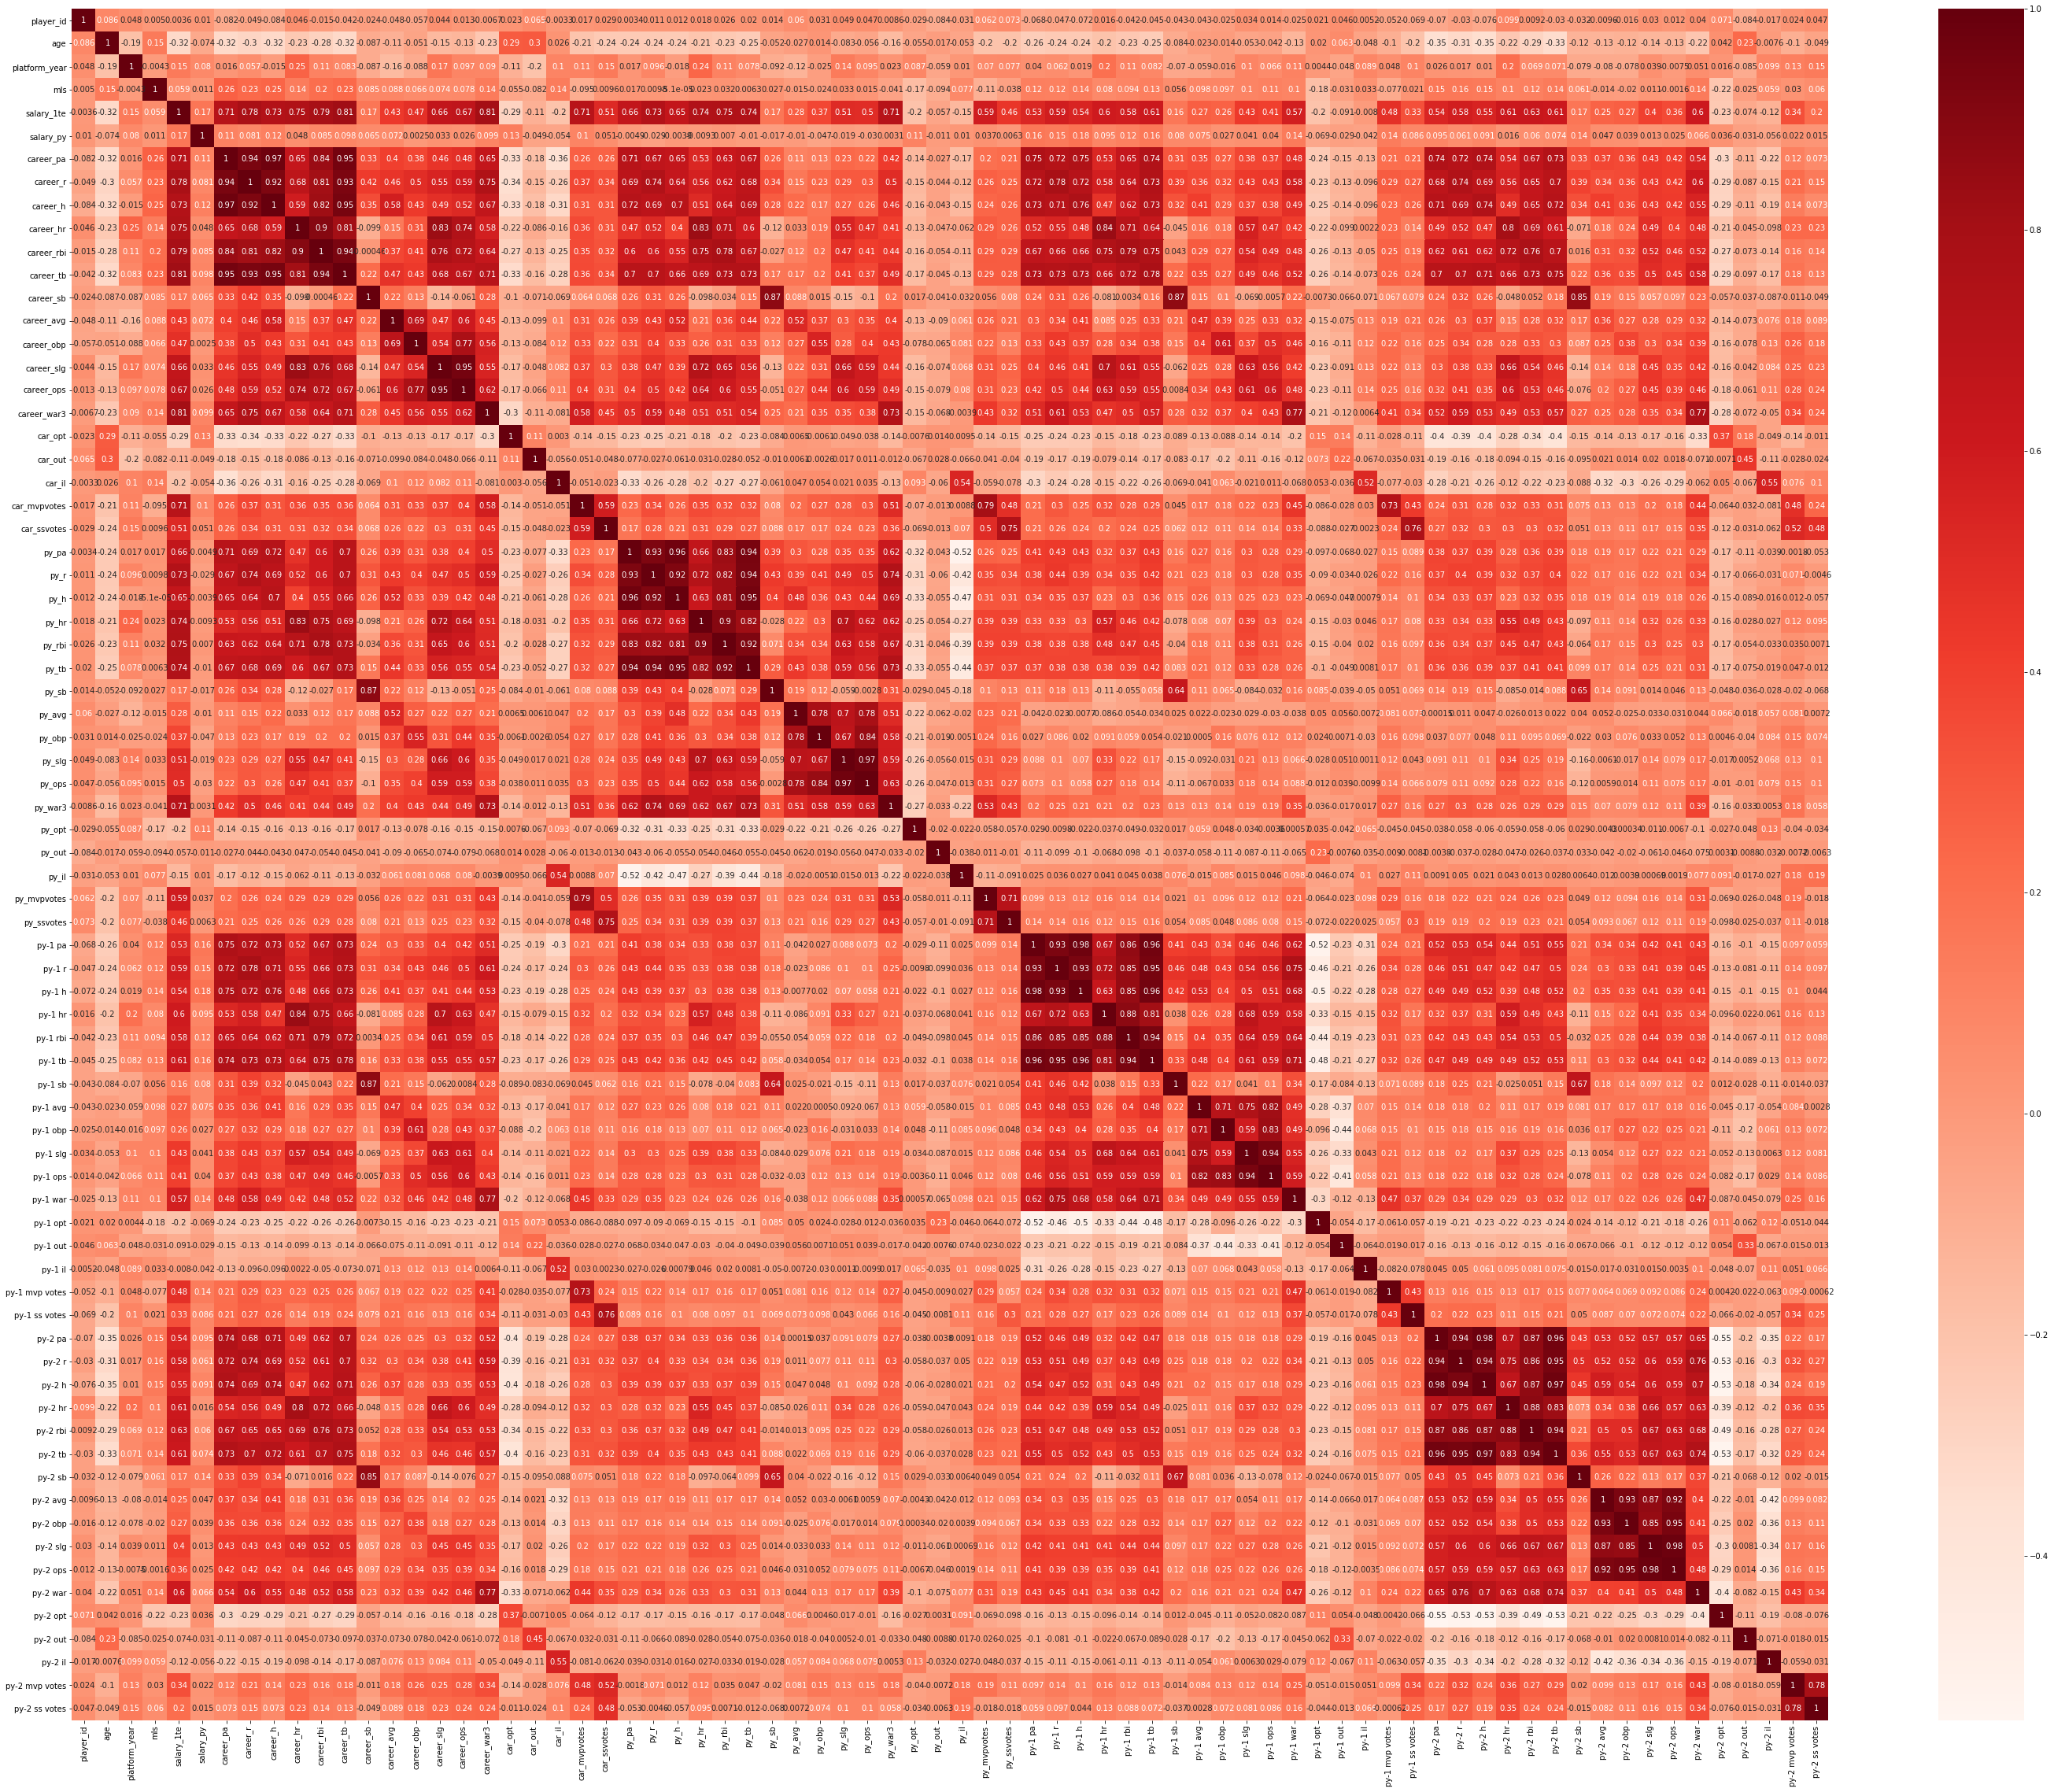

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(50, 40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
#Correlation with output variable
cor_target = abs(cor['salary_1te'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

salary_1te      1.000000
career_pa       0.714054
career_r        0.777029
career_h        0.728684
career_hr       0.750609
career_rbi      0.792747
career_tb       0.813425
career_slg      0.659816
career_ops      0.671081
career_war3     0.805467
car_mvpvotes    0.705490
car_ssvotes     0.512778
py_pa           0.659647
py_r            0.731701
py_h            0.649383
py_hr           0.743631
py_rbi          0.749820
py_tb           0.744930
py_slg          0.509189
py_ops          0.501787
py_war3         0.714606
py_mvpvotes     0.593758
py-1 pa         0.533511
py-1 r          0.585885
py-1 h          0.542578
py-1 hr         0.598165
py-1 rbi        0.584484
py-1 tb         0.608719
py-1 war        0.572704
py-2 pa         0.537526
py-2 r          0.580371
py-2 h          0.551556
py-2 hr         0.607566
py-2 rbi        0.629514
py-2 tb         0.611278
py-2 war        0.604373
Name: salary_1te, dtype: float64

## Model Building

### Independent variable
Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. 

Independent or Input variable (X) = Feature variable = Predictor variable

### Dependent variable
Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable.

Dependent or Output variable (y) = Target variable = Response variable

In [12]:
# Declare feature variable and target variable
feature_variable=df[['primary_position','career_pa', 'career_r', 'career_h', 'career_hr', 'career_rbi', 'career_tb', 'career_slg', 'career_ops', 
                     'career_war3', 'car_mvpvotes', 'car_ssvotes', 'py_pa', 'py_r', 'py_h', 'py_hr', 'py_rbi', 'py_tb', 
                     'py_slg', 'py_ops', 'py_war3', 'py_mvpvotes', 'py-1 pa', 'py-1 r', 'py-1 h', 'py-1 hr', 'py-1 rbi',
                     'py-1 tb', 'py-1 war', 'py-2 pa', 'py-2 r', 'py-2 h', 'py-2 hr', 'py-2 rbi', 'py-2 tb', 'py-2 war']]

target_variable=df.loc[:, 'salary_1te']

For categorical variables('primary_position',
 'py_as', 'py_mvp', 'py_ss', 'py-1 as', 'py-1 mvp', 'py-1 ss', 'py-2 as', 'py-2 mvp', 'py-2 ss'), I only include primary_position, since all the other ones already have corresponding numeric variables(asvotes, mvpvotes, ssvotes)

In [13]:
#dummy variable for primary_position
feature_variable = pd.concat([feature_variable, pd.get_dummies(feature_variable[['primary_position']])], axis=1)
feature_variable = feature_variable.drop(columns=['primary_position'])

### Assumptions for Linear Regression

Linear Regression can capture only the linear relationship hence there is an underlying assumption that there is a linear relationship between the features and the target. Plotting a scatterplot with all the individual variables and the dependent variables and checking for their linear relationship is a tedious process, we can directly check for their linearity by creating a plot with the actual target variables from the dataset and the predicted ones by our linear model. If the plot trend seems to be linear, we can assume that the features would also be linear.

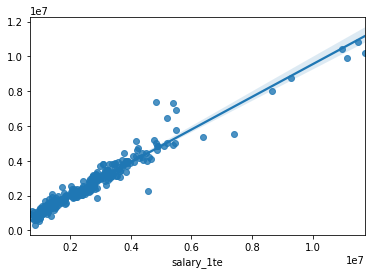

In [14]:
lm=LinearRegression()
lm.fit(feature_variable, target_variable)
pred=lm.predict(feature_variable)
resid=target_variable-pred
sns.regplot(target_variable, pred)

### Train test split

In [15]:
X=feature_variable.values
y=target_variable.values

In [16]:
# Split X and y into training and test data sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Mechanics of the model

I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

Now the model is ready to make predictions on the test data (X_test). Hence, I predict on the test data using the predict method.

In [17]:
# Fit the linear model
# Instantiate the linear regression object lm
lm = LinearRegression()

# Train the model using training data sets
lm.fit(X_train,y_train)

# Predict on the test data
y_pred=lm.predict(X_test)

### Model slope and intercept term

In [18]:
# Compute model slope and intercept
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [-4.04877877e+03 -4.76573595e+03  2.74044772e+04  5.84965400e+04
 -2.30130272e+03 -5.48125184e+03 -9.47655580e+06  4.61786043e+06
 -2.82884859e+04  8.03032530e+03  5.61065221e+04  2.91085300e+03
  5.06112633e+03 -1.66764980e+04 -3.15015698e+04  6.41128149e+03
  7.55331519e+03 -1.52430010e+06  1.25571323e+06  1.08494129e+05
 -1.63002692e+03  3.84636062e+03  2.24425148e+03 -2.50849040e+04
 -2.18816824e+04 -4.45991512e+03  8.24854804e+03  1.04576059e+05
  4.90266444e+03  5.45545439e+03 -3.34716028e+04 -4.97348862e+04
  1.14425730e+04  6.80530034e+03  1.07832236e+05  3.74300905e+05
 -7.29372649e+04 -9.15760185e+03 -3.04084364e+05  1.55598807e+05
 -8.92172470e+04  1.85569755e+05 -1.23007493e+05 -1.17065496e+05]
Estimated model intercept, b: (-127669.04398373514,)


## Regression Metrics for Model Performance

Now, it is time to evaluate model performance. For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value.

### RMSE
RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [19]:
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 455742.9741


### R2 Score
R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [20]:
# Calculate and print r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9307


## Interpretation and Conclusion

The RMSE value has been found to be 455742.9741. It means the standard deviation for our prediction is 455742.9741. So, sometimes we expect the predictions to be off by more than 455742.9741 and other times we expect less than 455742.9741. 

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be 0.9307. It means that this model explains 93.07 % of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it does provide good fit to the data.

The features I include in the model are mostly pa, r, h, hr, rbi, tb, war related, whether it's from career, py, py-1 or py-2.

## Residual analysis

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

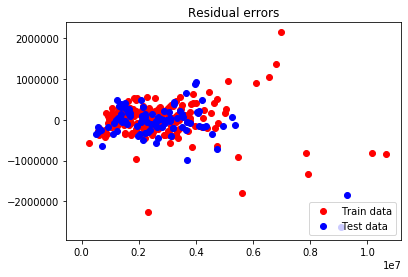

In [21]:
# Plotting residual errors
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## Checking for Overfitting and Underfitting

The model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). The model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the testing data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples. There is no clear evidence of both with training set being 0.9305 and test set score being 0.9307. 

In [22]:
# Checking for Overfitting or Underfitting the data
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.9305
Test set score: 0.9307


## Feature Selection 2.0

### Wrapper method
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

### Backward Elimination
I feed all the features from my first model at first. I check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range. The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it. I will first run one iteration here just to get an idea of the concept and then I will run the same code in a loop, which will give the final set of features. Here I am using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [23]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

array([3.65116173e-01, 6.33201427e-04, 5.63956697e-01, 1.84756199e-03,
       2.61411514e-02, 9.48183046e-01, 1.88485644e-01, 8.54054388e-02,
       2.78069462e-01, 6.41655399e-01, 6.63226034e-19, 9.19177835e-01,
       6.24953100e-02, 6.27787850e-01, 3.65147120e-02, 2.84238978e-01,
       3.13048263e-01, 1.36844368e-01, 5.85366395e-01, 4.65784734e-01,
       1.39459858e-01, 6.43976807e-01, 3.71467738e-03, 4.03644042e-01,
       1.17884635e-02, 3.95954044e-01, 8.06301582e-01, 2.29434319e-01,
       3.51695388e-02, 6.27509169e-03, 9.64347642e-01, 8.12217431e-03,
       1.99223528e-01, 5.92730237e-01, 1.62550555e-01, 3.06323340e-01,
       1.73585266e-03, 9.54132467e-01, 8.75525622e-01, 2.50871750e-02,
       1.66722845e-01, 7.56823931e-01, 7.45998766e-02, 9.16907217e-01,
       4.79575440e-01])

In [24]:
#Backward Elimination
cols = list(feature_variable.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = feature_variable[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['career_pa', 'career_h', 'career_hr', 'career_slg', 'career_ops', 'car_mvpvotes', 'py_pa', 'py_rbi', 'py_war3', 'py-1 pa', 'py-1 h', 'py-1 war', 'py-2 pa', 'py-2 h', 'primary_position_2', 'primary_position_5', 'primary_position_8']


## Model Building 2.0

This time I build the model using the selected features from backward elimination

In [25]:
# Declare feature variable and target variable
feature_variable=feature_variable[selected_features_BE]
target_variable=df.loc[:, 'salary_1te']

X=feature_variable.values
y=target_variable.values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

RMSE value: 417583.1253
R2 Score value: 0.9419
Training set score: 0.9243
Test set score: 0.9419


Seems that the backward elimination works with the result being slightly better when ['career_pa', 'career_h', 'career_hr', 'career_slg', 'career_ops', 'car_mvpvotes', 'py_pa', 'py_rbi', 'py_war3', 'py-1 pa', 'py-1 h', 'py-1 war', 'py-2 pa', 'py-2 h', 'primary_position_2', 'primary_position_5', 'primary_position_8'] are my independent variables.

## Potential variables that may improve the model

As for the variables not provided in the dataset that I think would be useful to improving the model include<br> 
1.Advanced metrics like xwOBA, wRC+, DRC+, xERA, FIP, DRA-, Def, OAA, DRS from career, py, py-1, py-2<br>
2.Minor league non-accumulative stats, since how long a player stay in the minor league probably does not correlate well with his ability<br>
3.Gold glove votes through career, py, py-1, py-2<br>